## Exploration on HGT File

### 1.Terminologies

- SRTM (Shutle Radar Topography Mission)
- DEM (Digital Elevation Model)
- [Useful Link](https://librenepal.com/article/reading-srtm-data-with-python/)

### 2. Calculate Elevation given GPS coordinates and HGT files

In [1]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
%matplotlib inline

In [2]:
SAMPLES = 1201 # Change this to 3601 for SRTM1
HGTDIR = r'/Users/sunzhenyu/Documents/Projects/Geospatial-Data-Analysis/data/elevation_data/SRTM3'

In [3]:
hgt_dict = dict()
for sub_folder_name in os.listdir(HGTDIR):
    try:
        filename_list = os.listdir(os.path.join(HGTDIR, sub_folder_name))
        for filename in filename_list:
            hgt_dict[filename]=sub_folder_name
    except:
        pass

In [7]:
# with open('hgt_mapping.json', 'w') as fp:
#     json.dump(hgt_dict, fp)

In [8]:
def get_file_name(lon, lat, hgt_dict):
    """
    Returns filename such as N27E086.hgt, concatenated
    with HGTDIR where these 'hgt' files are kept
    """

    if lat >= 0:
        ns = 'N'
    elif lat < 0:
        ns = 'S'

    if lon >= 0:
        ew = 'E'
    elif lon < 0:
        ew = 'W'

    hgt_file = "%(ns)s%(lat)02d%(ew)s%(lon)03d.hgt" % {'lat': abs(np.floor(lat)), 'lon': abs(np.floor(lon)), 'ns': ns, 'ew': ew}
    if hgt_file in hgt_dict.keys():
        print(hgt_dict[hgt_file])
        hgt_file_path = os.path.join(HGTDIR, hgt_dict[hgt_file], hgt_file)
        if os.path.isfile(hgt_file_path):
            return hgt_file_path
        else:
            return None
    else:
        return None

In [9]:
def read_elevation_from_file(hgt_file_path, lon, lat):
    with open(hgt_file_path, 'rb') as hgt_data:
        # Each data is 16bit signed integer(i2) - big endian(>)
        elevations = np.fromfile(hgt_data, np.dtype('>i2'), SAMPLES*SAMPLES)\
                                .reshape((SAMPLES, SAMPLES))

        lat_row = int(round((lat - int(np.floor(lat))) * (SAMPLES - 1), 0))
        lon_row = int(round((lon - int(np.floor(lon))) * (SAMPLES - 1), 0))
#         print(lat_row, lon_row)

        return elevations[SAMPLES - 1 - lat_row, lon_row].astype(int)

In [10]:
def get_elevation(lon, lat):
    hgt_file_path = get_file_name(lon, lat, hgt_dict)
    if hgt_file_path:
        return read_elevation_from_file(hgt_file_path, lon, lat)
    # Treat it as data void as in SRTM documentation
    # if file is absent
    return -32768

In [13]:
get_elevation(lon=-1.9674214, lat=27.6984175)

Africa


301

In [12]:
get_elevation(lon=86.894102, lat=27.9956)

Eurasia


7255

### 3. Visualization on each HGT file

In [13]:
def elevation_visulization(lon, lat, save_fig=False, current_dir=r'', color_step=5):
    hgt_file_path = get_file_name(lon, lat, hgt_dict)
    with open(hgt_file_path, 'rb') as hgt_data:
        # Each data is 16bit signed integer(i2) - big endian(>)
        dem_array = np.fromfile(hgt_data, np.dtype('>i2'), SAMPLES*SAMPLES)\
                                .reshape((SAMPLES, SAMPLES))
    lat_row = int(round((lat - int(np.floor(lat))) * (SAMPLES - 1), 0))
    lon_row = int(round((lon - int(np.floor(lon))) * (SAMPLES - 1), 0))
    print(lat_row, lon_row)
    
    #Plot our data with Matplotlib's 'contourf'
    fig = plt.figure(figsize = (12, 12))
    ax = fig.add_subplot(111)
    img = ax.contourf(dem_array[::-1], cmap = "jet", 
                levels = list(range(np.sort(list(set(dem_array.flatten())))[1], np.max(dem_array), color_step)))
    ax.add_patch(Circle((abs(lon_row), abs(lat_row)), radius=10, color='red'))
    fig.colorbar(img)
    plt.gca().set_aspect('equal', adjustable='box')
    if save_fig:
        plt.savefig(os.path.join(current_dir, 'Longitude={}, Latitude={}.jpg'.format(lon, lat)))
    return dem_array

Eurasia
1195 1073


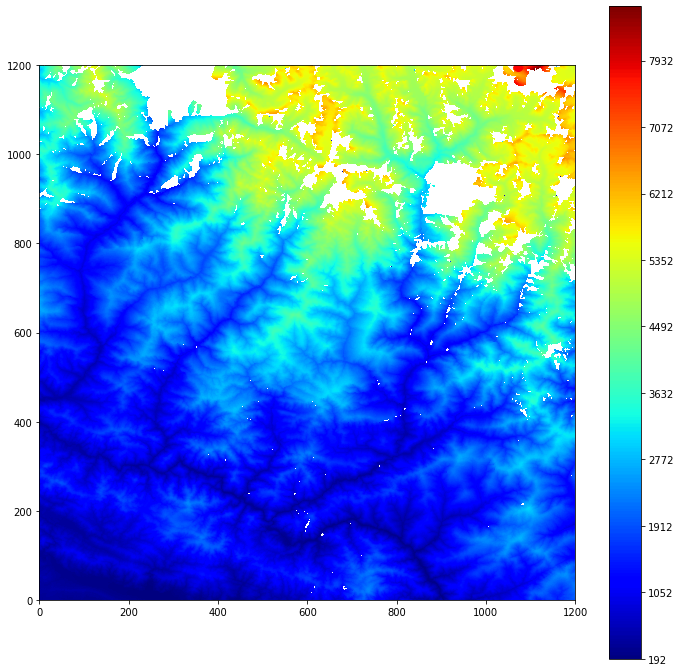

In [29]:
dem_array = elevation_visulization(lon=86.894102, lat=27.9956, 
                       save_fig=False, current_dir=r'visualization samples',
                       color_step=20)